# 캐글 필사 스터디
## 1. Binary Classification - Tabular data
### 1st level. Titanic competition
#### [2nd kernel] EDA To Prediction(DieTanic)
- https://www.kaggle.com/ash316/eda-to-prediction-dietanic
- 1차 필사: 2021.10.11.
- 2차 필사:
- 3차 필사:





---





- 목표: 예측 모델링 문제의 워크플로우가 어떻게 이루어지는지 설명하는 것. feature 확인 방법, feature 추가, Machine Learning 등
- 초보자들도 이해할 수 있게끔 단계별로 작성한 커널

## Contents of the Notebook:
### Part1: Exploratory Data Analysis(EDA):
1)Analysis of the features. 특성 분석

2)Finding any relations or trends considering multiple features. 다양한 특성을 고려한 관계나 동향 파악

### Part2: Feature Engineering and Data Cleaning:
1)Adding any few features. 피처 추가

2)Removing redundant features. 중복값 제거

3)Converting features into suitable form for modeling. 모델링에 적합한 형태로 특성 변환

### Part3: Predictive Modeling 예측 모델링
1)Running Basic Algorithms. 기본 알고리즘 실행

2)Cross Validation. 교차 검증

3)Ensembling. 앙상블링

4)Important Features Extraction. 주요 특성 추출

## Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') #?

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Study/kaggle_study/1_1.Titanic/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 결측치 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### How many Survived??

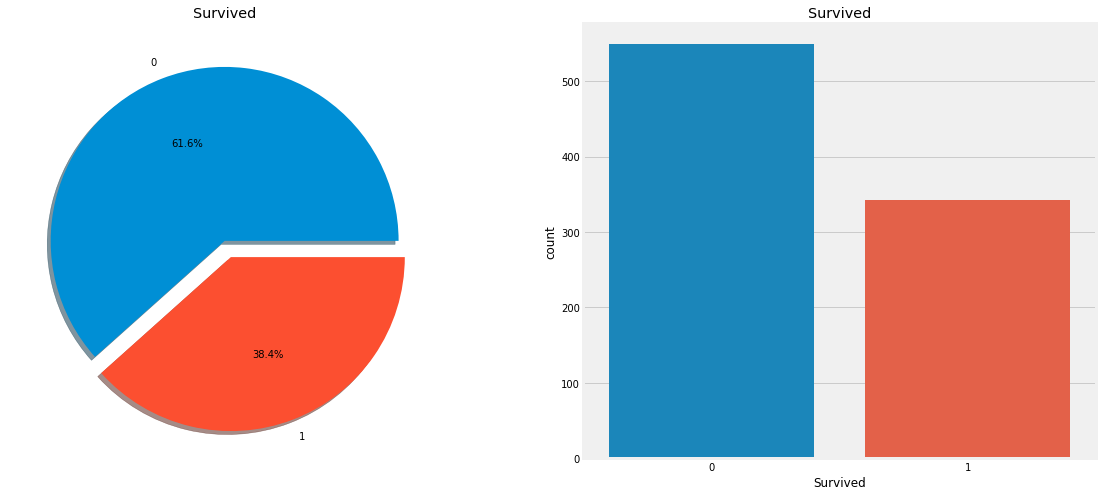

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], # 간격
                                         autopct='%1.1f%%', # 소수점
                                         ax=ax[0], # 첫번째 그래프
                                         shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

그 사고에서 살아남은 승객이 많지 않다는 것은 분명하다.

훈련 세트의 891명의 승객 중, 약 350명만이 살아남았습니다. 즉, 전체 훈련 세트의 38.4%만이 충돌에서 살아남았습니다. 우리는 데이터로부터 더 나은 통찰력을 얻고 어떤 범주의 승객들이 살아남았는지 그리고 누가 살아남지 못했는지를 보기 위해 더 많은 것을 파헤칠 필요가 있다.

### Types Of Features

Categorical Features:
- 범주형 변수는 둘 이상의 범주가 있는 변수이며 해당 형상의 각 값은 범주로 분류될 수 있습니다.예를 들어, 성별은 두 범주(남성 및 여성)를 갖는 범주형 변수입니다. 이제 이러한 변수를 정렬하거나 순서를 지정할 수 없습니다.(=Nominal Variables)
- Categorical Features in the dataset: Sex,Embarked.

Ordinal Features:
- 순서형 변수는 범주형 값과 유사하지만 두 변수의 차이점은 값 간에 상대적인 순서나 정렬이 가능하다는 것입니다. 예: 높이(높이, 중간, 짧은 값)와 같은 기능이 있는 경우 높이는 순서형 변수입니다. 변수에서 상대적 정렬을 사용할 수 있습니다.
- Ordinal Features in the dataset: PClass

Continous Feature:
- 형상은 두 점 사이 또는 형상 열의 최소값 또는 최대값 사이에 값을 취할 수 있는 경우 연속형이라고 한다.
- Continous Features in the dataset: Age


### Analysing The Features
### Sex--> Categorical Feature

In [11]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

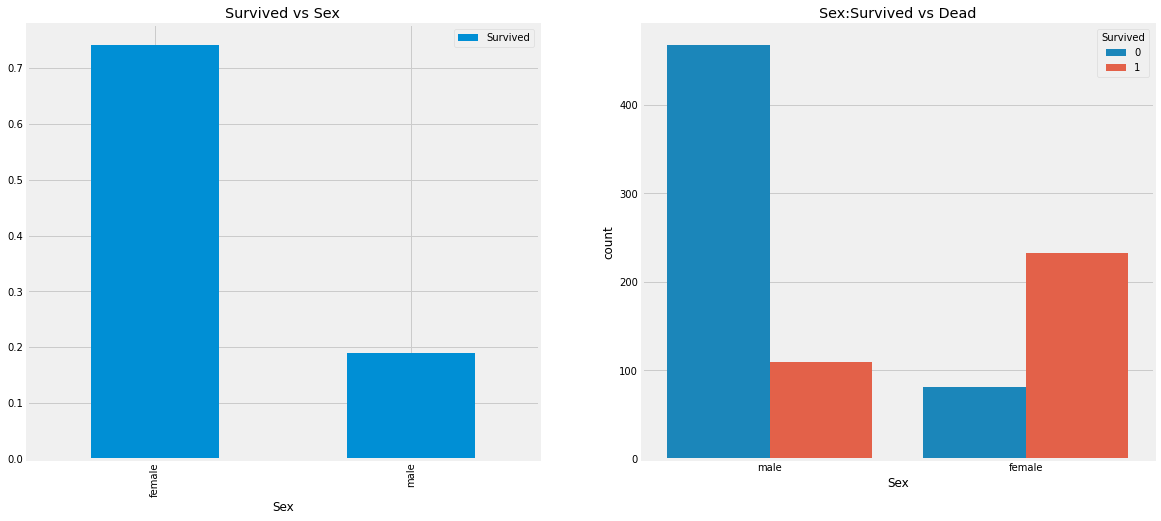

In [13]:
f, ax = plt. subplots(1, 2, figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

배에 탄 남자의 수가 여자의 수보다 훨씬 많다. 그러나 여전히 여성의 수는 남성의 거의 두 배이다. 배에 타고 있는 여성의 생존율은 약 75%, 남성은 약 18-19%이다.

이것은 모델링에 매우 중요한 특성으로 보입니다. 하지만 그게 최고일까요? 다른 특성을 확인해 보겠습니다.

### Pclass --> Ordinal Feature

In [15]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


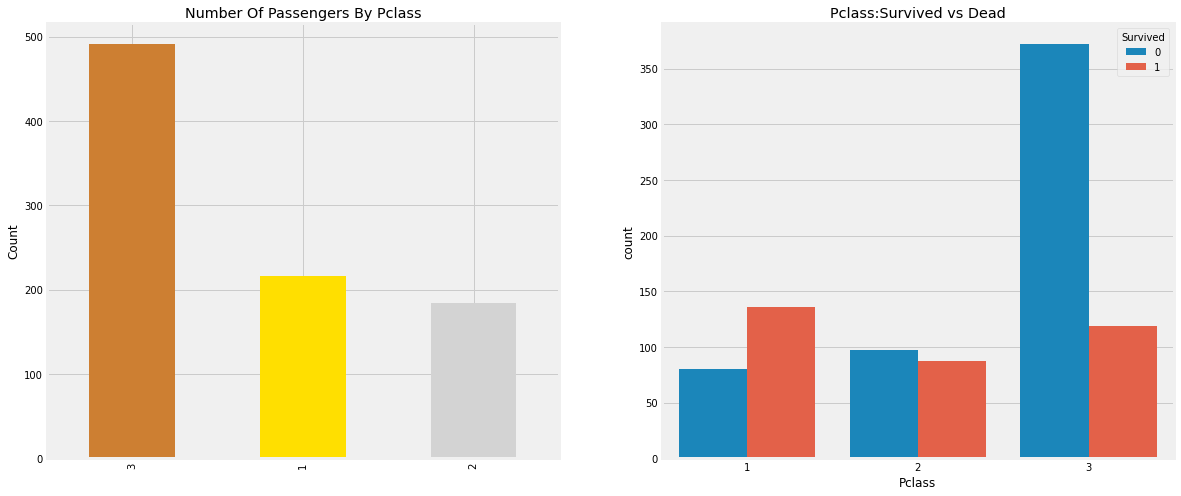

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 돈으로 모든 것을 살 수는 없다고 말한다. 하지만 우리는 구조하는 동안 P클래스 1의 패신저들이 매우 높은 우선 순위를 부여받았음을 분명히 알 수 있다. 비록 P클래스 3의 승객 수가 훨씬 더 많았지만, 여전히 생존자 수는 25% 정도로 매우 낮다.

Pclass 1%의 경우 생존율이 약 63%인 반면 Pclass2의 경우 약 48%입니다. 그래서 돈과 지위가 중요하다. 물질만능주의적인 세상이다.

조금 더 자세히 살펴보고 다른 흥미로운 관찰 결과를 확인해 보겠습니다. Sex와 Pclass를 함께 사용하여 생존율을 확인합니다.

In [17]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

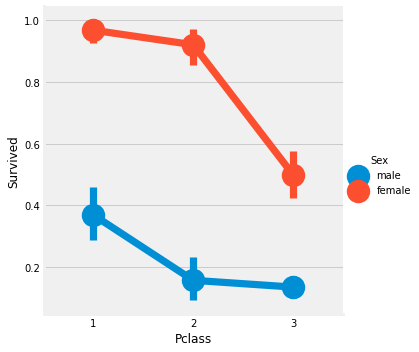

In [18]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

이 경우에는 범주형 값을 쉽게 분리할 수 있기 때문에 factorplot을 사용합니다.

CrossTab과 FactorPlot를 보면 Pclass1의 여성 94명 중 3명만이 사망했기 때문에 Pclass1의 여성 생존율이 약 95-96%임을 쉽게 추론할 수 있습니다.

P클래스와 상관없이 구조 과정에서 여성에게 우선권이 주어졌음이 분명하다. Pclass1 출신의 남성도 생존율이 매우 낮습니다.

Pclass도 중요한 기능인 것 같습니다. 다른 특징을 분석해보자.

### Age--> Continous Feature

In [19]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


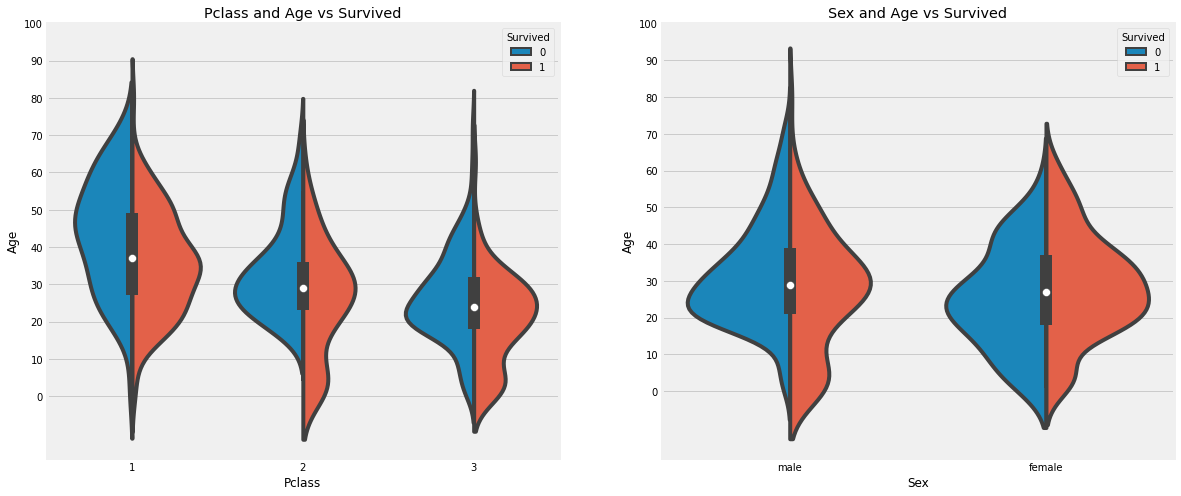

In [22]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split= True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10)) # 그래프 단위, 간격(0부터 100까지 10 단위)
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

관측치:
1) P클래스에 따라 어린이의 수가 증가하며, 10세 미만의 패신저(즉, 어린이)의 생존율은 P클래스에 관계없이 양호한 것으로 보인다.

2)Pclass1의 2050세 패신저들의 생존확률이 높고 여성에게는 더욱 좋다.

3)남성은 나이가 들수록 생존가능성이 낮아진다.


---


앞에서 살펴본 바와 같이, Age 기능은 177 null 값을 가집니다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령을 할당할 수 있습니다.

하지만 문제는, 많은 다양한 연령대의 사람들이 있었다는 거야. 우리는 평균연령이 29세인 4살짜리 아이를 배정할 수 없다. 승객이 어떤 연령대의 거짓말을 하는지 알 수 있는 방법은 없나요? #?

빙고!! 이름 기능을 확인할 수 있습니다. 그 특징을 보면, 우리는 그 이름들이 Mr 또는 Mrs.와 같은 경례를 가지고 있다는 것을 알 수 있다. 따라서 우리는 Mr과 Mrs의 평균값을 각각의 그룹에 할당할 수 있다.

In [26]:
data['Initial']=0
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') #뒤에 .(점)이 오는 문자열을 찾는다

정규식을 사용합니다.

In [28]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle이나 Mme와 같이 철자가 틀린 이니셜이 미스(Miss)를 나타내는 것도 있어요. 나는 그것들을 미스로 대체하고 다른 가치들을 위해 같은 것으로 대체할 것이다.

In [30]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                        inplace=True)

In [31]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [35]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age']=46

In [36]:
data.Age.isnull().any() # 결측치 확인

False

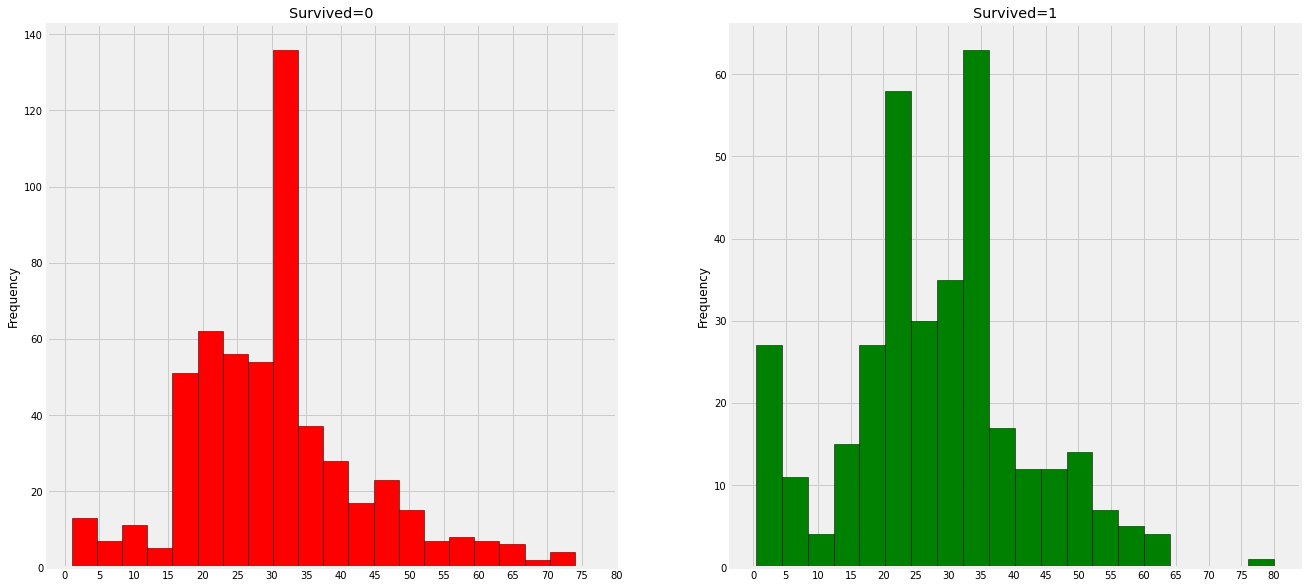

In [38]:
f, ax = plt.subplots(1,2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

Observations:

1)유아기(만 5세)는 대량으로 저장되었다(여성 및 아동 우선 정책).

2)최고령자(80세)를 구했습니다.

3) 30-40세는 최대 사망자

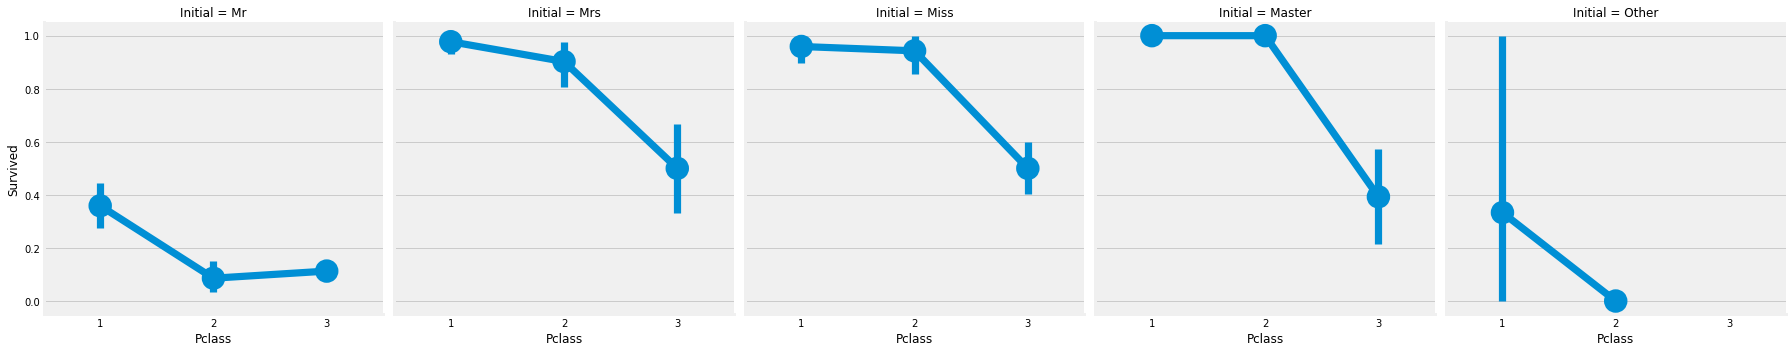

In [39]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

여성과 아동을 먼저 구했다는 것은 Pclass와 상관없이 진실이다.
? 선은 뭐지?

### Embarked--> Categorical Value

In [40]:
pd.crosstab([data.Embarked, data.Pclass], 
            [data.Sex, data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port Of Embarkation

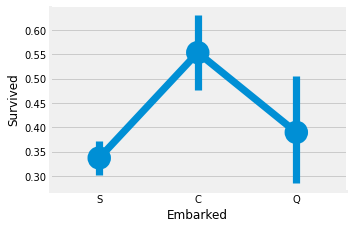

In [41]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

포트 C의 생존 확률은 약 0.55이고 S의 생존 확률은 가장 낮습니다.

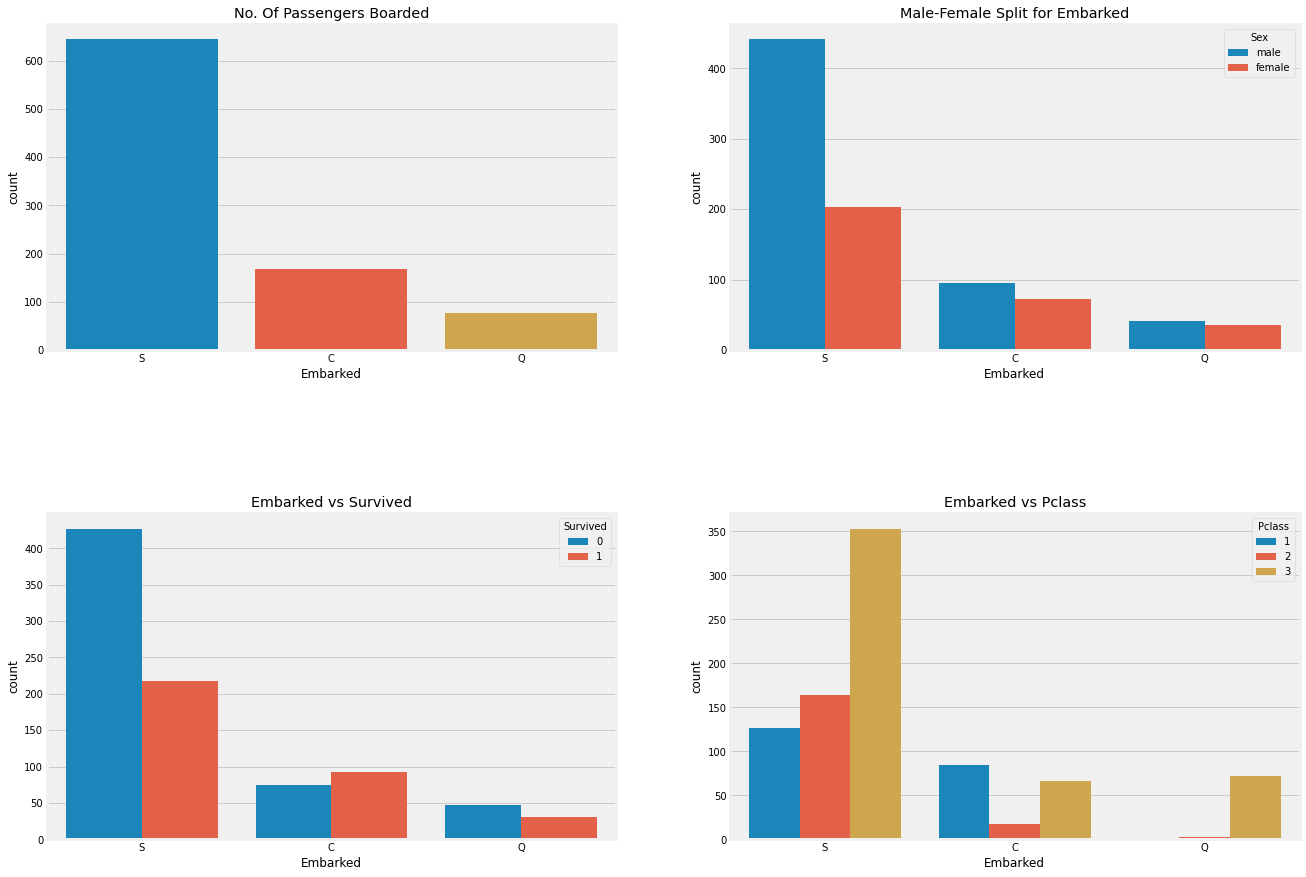

In [42]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

관측치:

1) Maximum passenegers boarded from S. Majority of them being from Pclass3: S에서 탑승한 최대 패신입니다. 그들 중 대부분은 P클래스3 출신이다.

2) C출발 승객은 상당부분 살아있어서 다행인것 같습니다. 그 이유는 아마도 모든 P클래스1, P클래스2 승객들의 구조일 것이다.

3)부자 대부분이 탄 항구를 바라본다. Pclass3에서 온 승객 중 81%가 생존하지 못했기 때문에 생존 가능성은 여전히 낮다.

4) Q항은 P클래스3의 95%에 가까운 승객이 탑승했다.

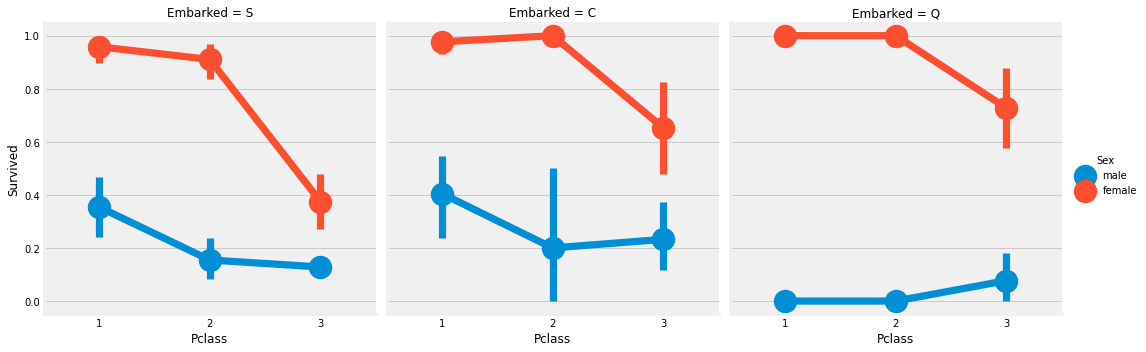

In [43]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col = 'Embarked', data=data)
plt.show()

관측치:
1)Pclass1과 Pclass2의 생존 확률은 Pclass에 관계없이 거의 1입니다.

2) Pclass3 Passenegers의 경우 남녀 모두 생존율이 매우 낮기 때문에 Port S는 매우 불운한 것으로 보입니다.(돈 문제)

3) 포트 Q는 거의 모든 P클래스 출신이 남성에게 가장 불리해 보인다.

### Filling Embarked NaN

In [44]:
data['Embarked'].fillna('S', inplace=True)

In [45]:
data.Embarked.isnull().any()

False

### SibSip-->Discrete Feature